# Preprocessing Data with sci-kit learn.

In [39]:
#import modules
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import data
df=pd.read_csv('agaricus-lepiota.data')
#change column names
df.columns=["Class", "Cap-Shape", "Cap-Surface", "Cap-Color", "Bruises", "Odor", "Gill-Attachment", "Gill-Spacing", "Gill-Size", "Gill-Color", "Stalk-Shape", "Stalk-Root", "Stalk-Surface-Above-Ring", "Stalk-Surface-Below-Ring", "Stalk-Color-Above-Ring", "Stalk-Color-Below-Ring", "Veil-Type", "Veil-Color", "Ring-Number", "Ring-Type", "Spore-Print-Color", "Population", "Habitat"]
df = df.applymap(lambda x: x.replace("'", ""))

#check for missing values
df.isna().sum()

df.head()

,Class,Cap-Shape,Cap-Surface,Cap-Color,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,Gill-Color,...,Stalk-Surface-Below-Ring,Stalk-Color-Above-Ring,Stalk-Color-Below-Ring,Veil-Type,Veil-Color,Ring-Number,Ring-Type,Spore-Print-Color,Population,Habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


## Create subset with the required columns

#### For this analysis, we use Odor and Habitat

In [23]:
df_subset=df[['Class','Odor','Habitat']]
df_subset.head()

,Class,Odor,Habitat
0,e,a,g
1,e,l,m
2,p,p,u
3,e,n,g
4,e,a,g


### Label Encoding  
For column with only 2 unique values ie class

In [81]:
le = preprocessing.LabelEncoder()
# Replace the codes used in the data with numeric values using labelencoder
df_subset.iloc[:,0]=le.fit_transform(df_subset.iloc[:,0])

df_subset.head()


,Class,Odor,Habitat
0,0,a,g
1,0,l,m
2,1,p,u
3,0,n,g
4,0,a,g


### Hot Encoding -  pd.get_dummies()
For columns with more than one unique value ie odor and habitat

In [46]:
y = df_subset['Class'].to_frame()
X = df_subset.drop('Class', axis=1)
X=pd.get_dummies(X)


### Create training set and test set  
- Training set = 0.75, test set=0.25

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=19)

### Logistic Regression

In [89]:
lg = LogisticRegression(solver = 'lbfgs')
lg.fit(X_train, y_train.values.ravel())
y_pred_test = lg.predict(X_test)
#calculate the accuracy score
acc_score=accuracy_score(y_test, y_pred_test)
print('Logistic Regression classifier Accuracy : {:.4f}'.format(acc_score))

Logistic Regression classifier Accuracy : 0.9857


##### - The accuracy of the logistic regression classifier is 0.9857 which is pretty good.

### Determine the column that is most relevant

In [84]:
columns_coef = pd.DataFrame(logreg.coef_, columns=X.columns, index=['coefficients'])
columns_coef.sort_values('coefficients', axis=1, ascending=False, inplace=True)
columns_coef.T.head(10)

,coefficients
Odor_f,4.410152
Odor_s,3.218319
Odor_y,3.203375
Odor_p,2.917856
Odor_c,2.701294
Habitat_m,2.304246
Odor_m,1.563707
Habitat_l,0.449275
Habitat_p,0.199566
Habitat_u,-0.428825


Odor is crucial in determining whether a mushroom is poisonous or edible. 
### Graph
Plot the results to confirm the results.

Text(0, 0.5, 'Edible/Poisonous')

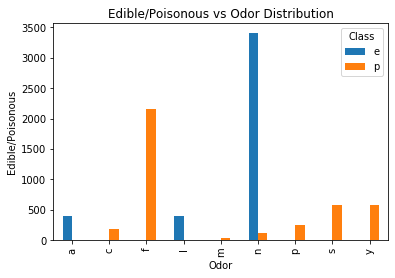

In [80]:
df_group_odor=df_subset.groupby(['Odor','Class'])
ax=df_group_odor.size().unstack().plot.bar()
ax.set_title('Edible/Poisonous vs Odor Distribution')
ax.set_ylabel('Edible/Poisonous')


## Conclusion
Odor plays a vital role in determining whether a mushroom is poisonous or edible. All mushrooms with a creosote, fishy, musty, pungent or spicy odor are poisonous. All mushrooms with an almond or anise odor are edible. Lastly, a large majority of mushrooms that lack an odor are edible.